# 감정 분석 딥러닝 생성


######## Environment Setting ########
Current Directory: C:\Users\NAM WOO JIN\SpeechTextClassifier_hansung
train length: 7404
test length: 823

######## Data Tokenizing ########
전체에서 3288개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>

######## data 변환 ########
data type: <class 'numpy.ndarray'>
data length: 7404
texts 0: 너무 예민 여자 친구
data: [[   0    0    0 ...  368   26   11]
 [   0    0    0 ...  166   54    1]
 [   0    0    0 ...   32  116   53]
 ...
 [   0    0    0 ...   25  109    1]
 [   0    0    0 ...   99    7   30]
 [   0    0    0 ...   37 3288   33]]
data 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  16 368  26  11]

######## T

C:\Users\NAM WOO JIN\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7404 samples, validate on 823 samples
Epoch 1/10
7404/7404 [==============================] - 13s 2ms/step - loss: 1.1380 - acc: 0.5167 - val_loss: 1.0249 - val_acc: 0.5674
Epoch 2/10
7404/7404 [==============================] - 12s 2ms/step - loss: 0.9023 - acc: 0.6341 - val_loss: 0.9099 - val_acc: 0.6306
Epoch 3/10
7404/7404 [==============================] - 14s 2ms/step - loss: 0.7368 - acc: 0.7058 - val_loss: 0.8863 - val_acc: 0.6525
Epoch 4/10
7404/7404 [==============================] - 12s 2ms/step - loss: 0.6110 - acc: 0.7734 - val_loss: 0.9182 - val_acc: 0.6476
Epoch 5/10
7404/7404 [==============================] - 13s 2ms/step - loss: 0.5111 - acc: 0.8139 - val_loss: 0.9254 - val_acc: 0.6598
Epoch 6/10
7404/7404 [==============================] - 12s 2ms/step - loss: 0.4352 - acc: 0.8422 - val_loss: 1.0421 - val_acc: 0.6659
Epoch 7/10
7404/7404 [==============================] - 14s 2ms/step - loss: 0.3781 - acc: 0.8618 - val_loss: 1.0530 - val_acc: 0.6598
Epoch 8/

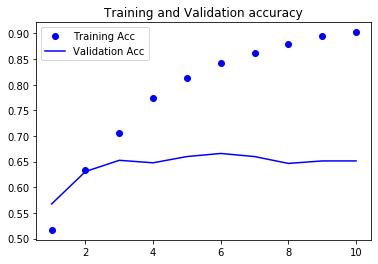

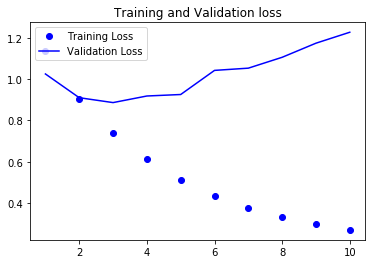

In [16]:
import os
import time
start = time.time()

path = "C:/Users/NAM WOO JIN/SpeechTextClassifier_hansung" #우진path

def read_data(filename, encoding):
    """읽기 함수"""
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[0:]  # txt 파일의 헤더(id document label)는 제외하기는 1:
    return data


print('\n######## Environment Setting ########')
filename = 'train_NaturalLanguageData'
valname = 'test_NaturalLanguageData'                         # 테스트 파일이 없어도 이 부분을 지우지 않아도 됨

train_file_name = filename+'.txt'                           # 입력할 파일의 이름
test_file_name = valname+'.txt'
model_name = filename+'.h5'                                 # 저장될 모델의 이름
tokenizer_name = filename+'.pickle'                         # 저장될 토크나이저의 이름
epochs = 10                                                 # 수행할 에포크의 수


os.chdir(path)
print("Current Directory:", os.getcwd())

data = read_data(train_file_name, encoding='cp949')
print('train length:', len(data))
texts = [line[2] for line in data]                      # 훈련데이터 본문
labels = [line[3] for line in data]                     # 훈련데이터 레이블 부분
labels = list(map(int, labels))                         # 문자열을 숫자로 변환한다

# 성능측정을 위하여 테스트 데이터를 사용
data_val = read_data(test_file_name, encoding='cp949')
print('test length:', len(data_val))
texts_val = [line[2] for line in data_val]          # 테스트 데이터 본문
labels_val = [line[3] for line in data_val]         # 테스트 데이터 레이블 부분
labels_val = list(map(int, labels_val))             # 문자열을 숫자로 변환한다



print('\n######## Data Tokenizing ########')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


tokenizer = Tokenizer(num_words=15000)                      # 상위빈도 15,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts)                               # 단어 인덱스를 구축한다
word_index = tokenizer.word_index                           # 단어 인덱스만 가져온다

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))      # 10,000개가 아닌 전체인 88,582개를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다.
print('word_index type: ', type(word_index))


print('\n######## data 변환 ########')
data = tokenizer.texts_to_sequences(texts)                  # 상위 빈도 15,000(max_words)개의 단어만 word_index의 숫자 리스트로 변환. Tokenizer 결과가 여기서 반영된다.
data = pad_sequences(data, maxlen=100)                      # 길이를 고정시킨다. maxlen의 수만큼으로 2D 텐서를 만든다. 200을 넘는 데이터는 잘라내고, 모자라는 데이터는 0으로 채운다
data_val = tokenizer.texts_to_sequences(texts_val)
data_val = pad_sequences(data_val, maxlen=100)

print('data type:', type(data))
print('data length:', len(data))
print('texts 0:', texts[0])
print('data:', data)
print('data 0:', data[0])



def to_one_hot(sequences, dimension):                       # 원-핫 인코딩 함수
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

labels = to_one_hot(labels, dimension=4)
labels_val = to_one_hot(labels_val, dimension=4)


print('\n######## Train 데이터와 Test 데이터 준비 ########')
print('데이터 텐서의 크기:', data.shape)          # (25000, 10000)
print('레이블 텐서의 크기:', labels.shape)        # (25000,)

x_train = data
y_train = labels
x_val = data_val
y_val = labels_val
        

print('\n######## Define Model ########')
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()                                                       # 모델을 새로 정의
model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))    # 밀집벡터를 사용하는 임베딩 층. 출력층은 3D가 됨.
model.add(Flatten())                                                       # 3D 임베딩 텐서를 2D 텐서로 펼친다.
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))
model.summary()


print('\n######## Compile Model ########')
loss = 'categorical_crossentropy'
model.compile(optimizer='rmsprop', loss=loss, metrics=['acc'])             # adam 또는 rmsprop을 많이 사용한다



print('\n######## Train Model ########')
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=epochs, batch_size=16, validation_data=(x_val, y_val), verbose=1)
history_dict = history.history


print('\n######## Save Model ########')
os.chdir(path+"/model")
import pickle
model.save(model_name)

with open(tokenizer_name, 'wb') as file:            # 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)


end = time.time()
print('Elapsed seconds:', end - start)
print("모든 작업이 끝났습니다.")



print('\n######## Accuracy & Loss ########')
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) + 1)

print('\n######## Plotting Performance ########')
# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다.
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend(loc=2)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=2)
plt.show()
